# <span style='font-family:"Times New Roman"'> <span styel=''> **CANCER EXPLORATION**

## <span style='font-family:"Times New Roman"'> <span styel=''> *Emile Cohen* 
*March 2020*

**Goal:** In this notebook, we have all the visualizations of the cohort based on the cancer types. In the future, we will create Visual Summaries for each cancer.
    
The Notebook is divided in X parts:
   
* **1. Cancer Discovery**
* **2. Metrics Panels per Cancer Type**


**NB1:** In each part, you must run the cells from the begining in order to initialize the variables

**NB2:** All functions used for the plots are located in utils/custom_tools.py

---

In [11]:
%run -i '../../utils/setup_environment.ipy'
from utils.analysis_tools import *

import warnings, math
warnings.filterwarnings('ignore')
import ptitprince as pt
import IPython.display

data_path = '../../data/'

Setup environment... done!


<span style="color:green">✅ Working on **mskimpact_env** conda environment.</span>

---
## Cancer Discovery

### Cancer Type proportion in the cohort

In [27]:
master = pd.read_pickle(data_path + 'merged_data/master_file.pkl')
cancer_count = get_groupby(master, 'Cancer_Type', 'count').sort_values(by=['count'], ascending=False)
cancer_count

,count
Cancer_Type,
Non-Small Cell Lung Cancer,4228
Breast Cancer,4148
Colorectal Cancer,2972
Prostate Cancer,1595
Glioma,1581
Pancreatic Cancer,1485
Melanoma,1094
Endometrial Cancer,1042
Soft Tissue Sarcoma,1039


### Subgroup proportion per cancer type

count  \
mut_cn_group                                                    >=1_LOSS   
Cancer_Type                                                                
Undifferentiated Embryonal Sarcoma of the Liver                      NaN   
Tubular Adenoma of the Colon                                         1.0   
Gastrointestinal Neuroendocrine Tumors of the Esophagus/Stomach      1.0   
Choroid Plexus Tumor                                                 2.0   
Miscellaneous Brain Tumor                                            1.0   
B-Lymphoblastic Leukemia/Lymphoma                                    1.0   
Penile Cancer                                                        1.0   
Sex Cord Stromal Tumor                                               1.0   
Miscellaneous Neuroepithelial Tumor                                  NaN   
Gestational Trophoblastic Disease                                    1.0   
Wilms Tumor                                                          5.0   
Mature T and NK Neoplasms                                            3.0   
Sellar Tumor                                                         7.0   
Peritoneal Cancer, NOS                                               6.0   
Nerve Sheath Tumor                                                   3.0   
Thymic Tumor                                                         6.0   
Anal Cancer                                                          3.0   
Retinoblastoma                                                       NaN   
Embryonal Tumor                                                      3.0   
CNS Cancer                                                           NaN   
Peripheral Nervous System                                            NaN   
Vaginal Cancer                                                       5.0   
Breast Sarcoma                                                       7.0   
Adrenocortical Carcinoma                                            15.0   
Gastrointestinal Neuroendocrine Tumor                               14.0   
Ampullary Cancer                                                    27.0   
Mature B-Cell Neoplasms                                             18.0   
Appendiceal Cancer                                                  30.0   
Cervical Cancer                                                     13.0   
Germ Cell Tumor                                                     13.0   
Small Bowel Cancer                                                  32.0   
Gastrointestinal Stromal Tumor                                      12.0   
Salivary Gland Cancer                                               45.0   
Mesothelioma                                                        23.0   
Uterine Sarcoma                                                     39.0   
Bone Cancer                                                         30.0   
Skin Cancer, Non-Melanoma                                           32.0   
Thyroid Cancer                                                      51.0   
Renal Cell Carcinoma                                                45.0   
Head and Neck Cancer                                                43.0   
Small Cell Lung Cancer                                             173.0   
Soft Tissue Sarcoma                                                117.0   
Melanoma                                                            98.0   
Hepatobiliary Cancer                                               157.0   
Endometrial Cancer                                                 258.0   
Bladder Cancer                                                     173.0   
Cancer of Unknown Primary                                          243.0   
Glioma                                                             104.0   
Esophagogastric Cancer                                             265.0   
Ovarian Cancer                                                     442.0   
Prostate Cancer                        

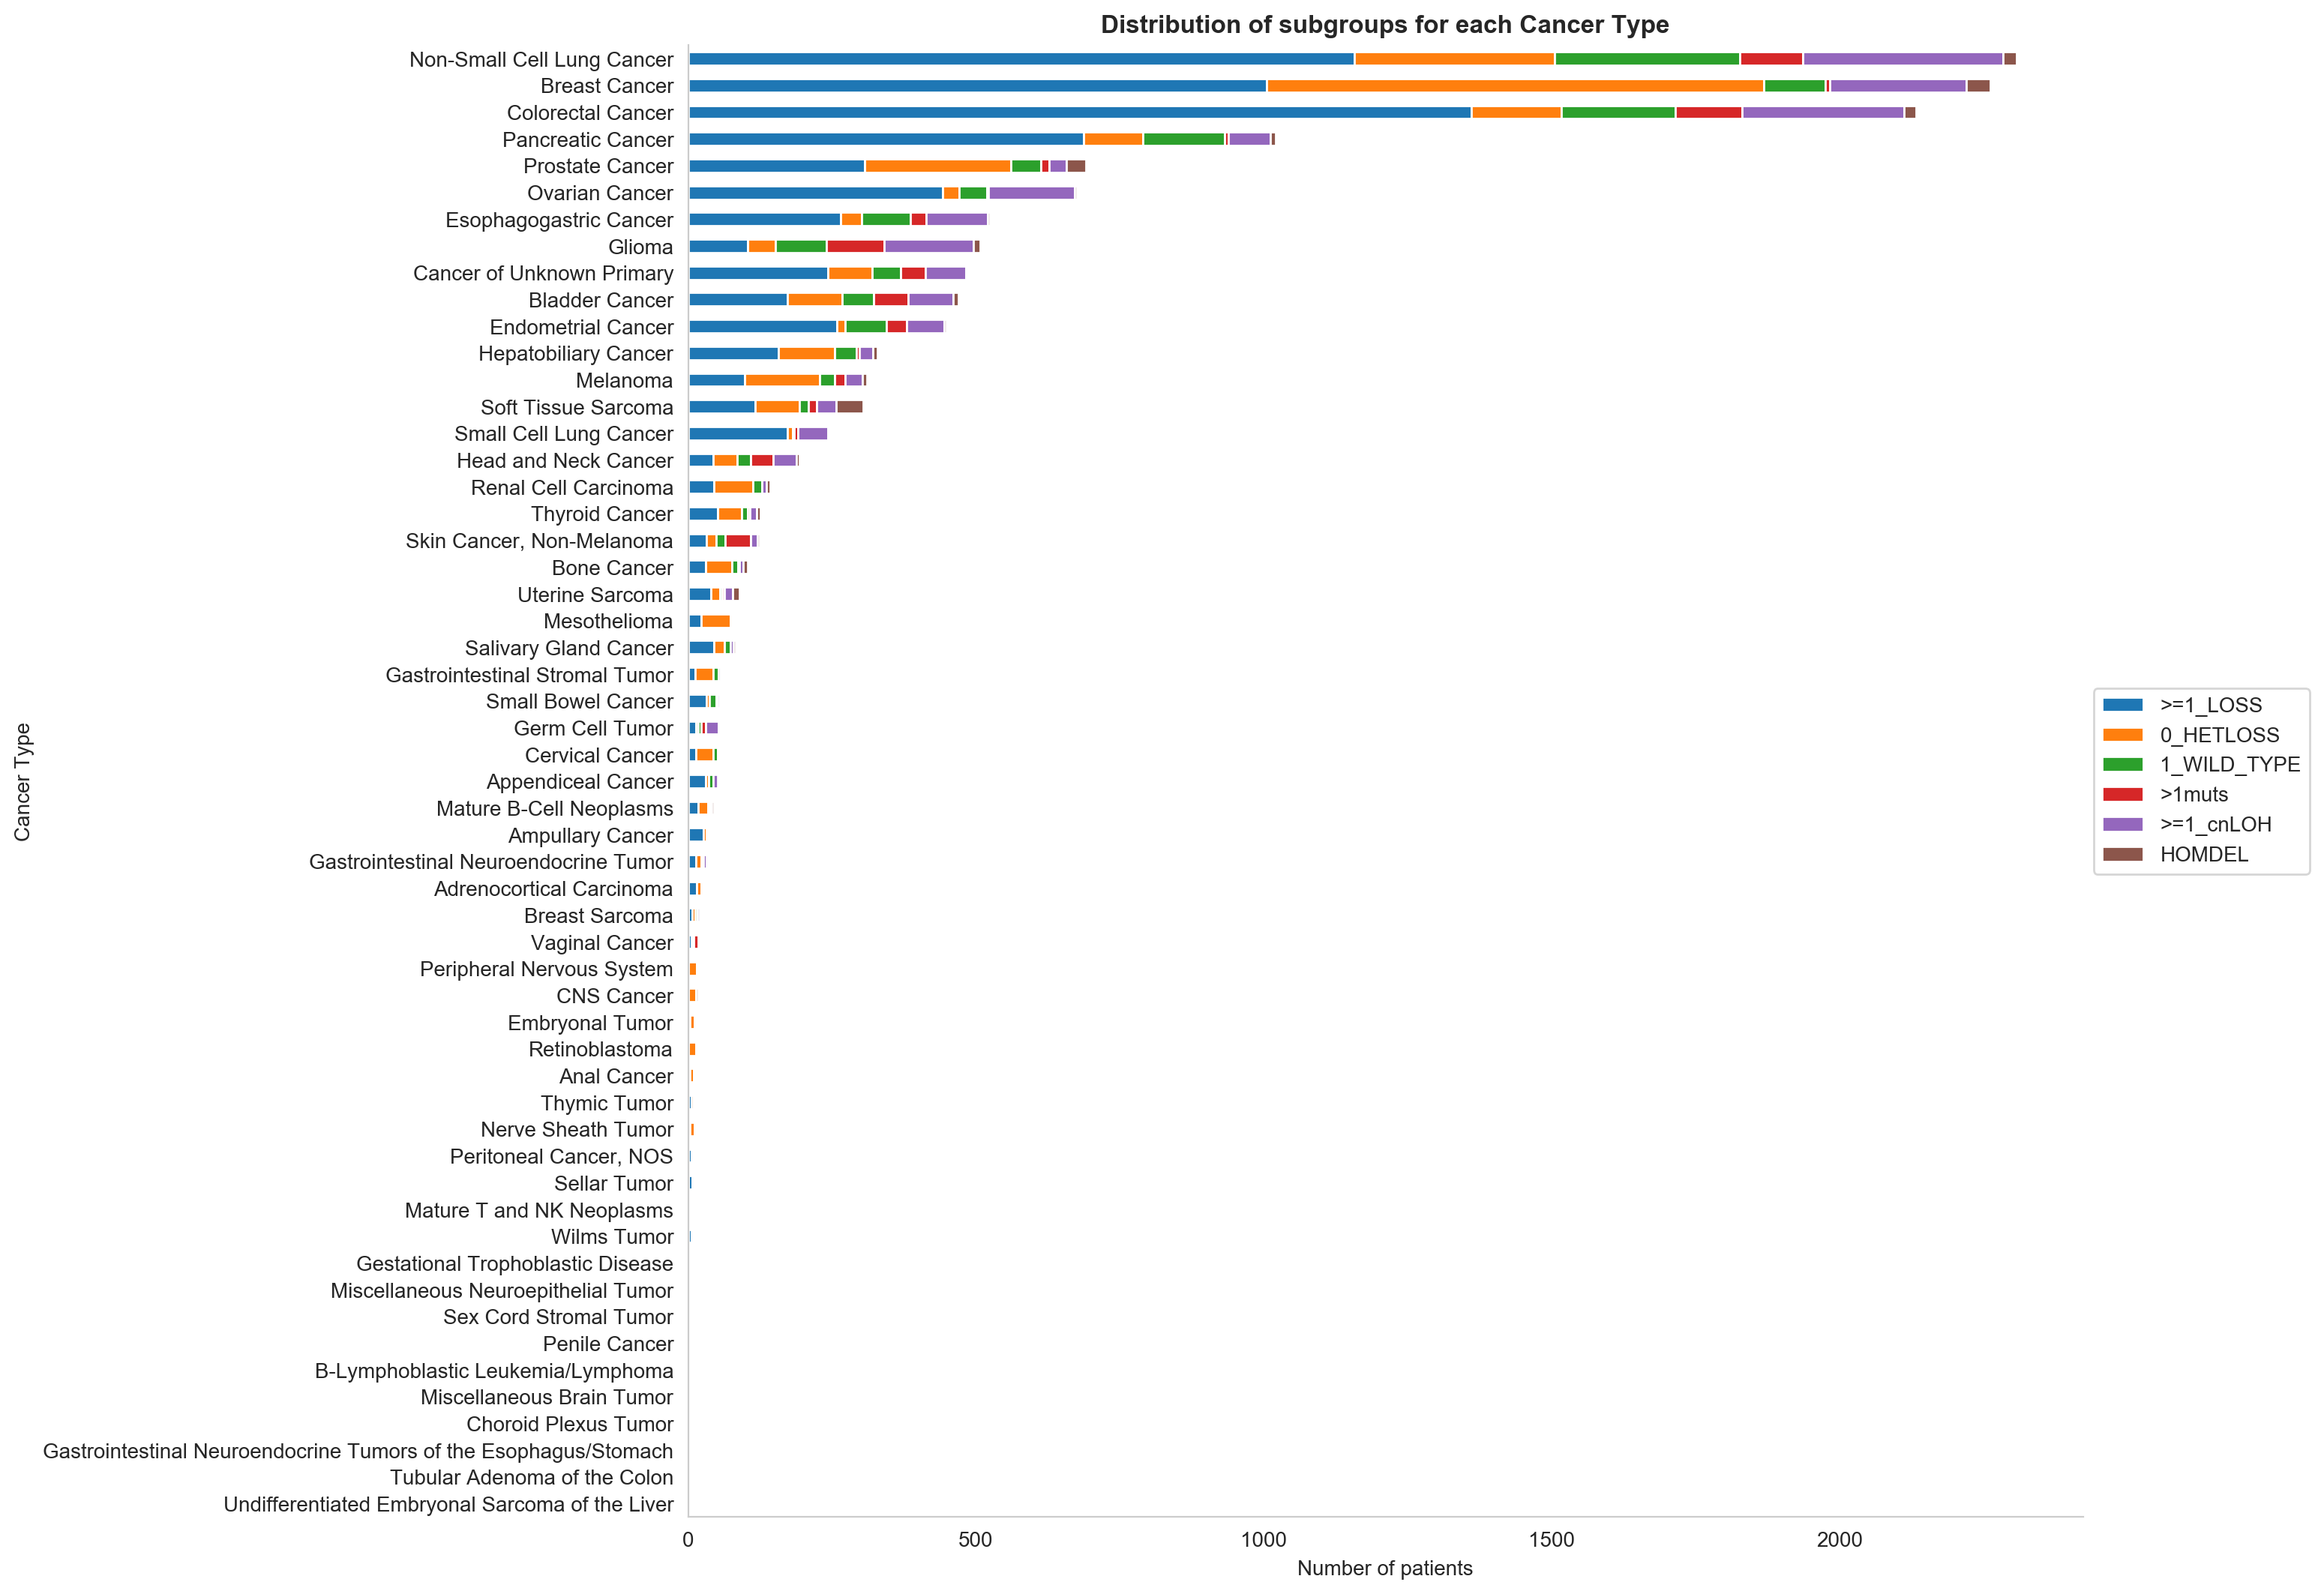

In [33]:
master = pd.read_pickle(data_path + 'merged_data/master_file.pkl')
master_cancer = master[['Cancer_Type', 'mut_cn_group']]
count = pd.DataFrame(pd.DataFrame(master_cancer.groupby(['Cancer_Type','mut_cn_group']).size(), columns=['count'])).unstack()#.groupby(['mut_cn_group','Cancer_Type']).sum()).unstack().sort_values(by=[('count',0)])
count['sum'] = count.sum(axis=1)
count = count[count[('sum','')]>=0]

count = count.sort_values(by=['sum'], ascending=True)[[('count',    '>=1_LOSS'),
                                                       ('count',   '0_HETLOSS'),
                                                        ('count', '1_WILD_TYPE'),
                                                        ('count',      '>1muts'),
                                                        ('count',   '>=1_cnLOH'),
                                                        ('count',      'HOMDEL')]]
display(count)
# We plot the table
get_mstacked_plot(count, 
                  'Distribution of subgroups for each Cancer Type',
                  ['>=1_LOSS','0_HETLOSS', '1_WILD_TYPE','>1muts','>=1_cnLOH','HOMDEL'],
                  'Number of patients',
                  'Cancer Type',
                  figsize = (15,13),
                  horiz=True)